In [131]:
%cd ../../../data/round3/days/

/Users/IvanTang/quant/IMC_Prosperity3_GraniteFlow/data/round3/days


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df0 = pd.read_csv('day0.csv')
df1 = pd.read_csv('day1.csv')
df1['timestamp'] = df1['timestamp'] + 1000000
df2 = pd.read_csv('day2.csv')
df2['timestamp'] = df2['timestamp'] + 2000000
df = pd.concat([df0, df1, df2], ignore_index=True)


In [134]:
print(df.columns)

Index(['timestamp', 'VOLCANIC_ROCK', 'VOLCANIC_ROCK_VOUCHER_9500',
       'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_10000',
       'VOLCANIC_ROCK_VOUCHER_10250', 'VOLCANIC_ROCK_VOUCHER_10500', 'T',
       'iv_9500', 'iv_9750', 'iv_10000', 'iv_10250', 'iv_10500', 'm_9500',
       'm_9750', 'm_10000', 'm_10250', 'm_10500', 'beta_0', 'beta_1', 'beta_2',
       'base_iv'],
      dtype='object')


In [179]:
slice = df[df['timestamp'] == 130000]

In [180]:
slice

,timestamp,VOLCANIC_ROCK,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500,T,iv_9500,iv_9750,...,m_10250,m_10500,beta_0,beta_1,beta_2,base_iv,base_iv_ma20,base_iv_ma50,base_iv_ma100,base_iv_ma200
1300,130000,10472.0,972.5,722.5,476.0,245.5,82.5,0.027262,0.224748,0.170234,...,-0.129775,0.016172,0.139877,0.042728,0.306637,0.139877,0.136461,0.136272,0.135513,0.135485


In [181]:
ivs = np.array([slice['iv_9500'].values[0], slice['iv_9750'].values[0], slice['iv_10000'].values[0], slice['iv_10250'].values[0], slice['iv_10500'].values[0]])
ms = np.array([slice['m_9500'].values[0], slice['m_9750'].values[0], slice['m_10000'].values[0], slice['m_10250'].values[0], slice['m_10500'].values[0]])
beta0, beta1, beta2 = slice['beta_0'].values[0], slice['beta_1'].values[0], slice['beta_2'].values[0]
base_iv = slice['base_iv'].values[0]

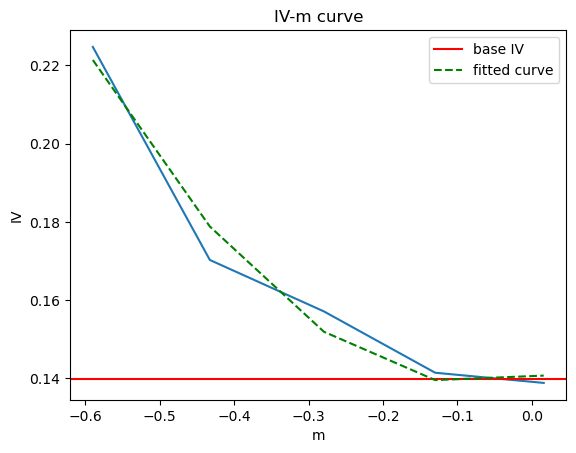

In [182]:
plt.plot(ms, ivs)
plt.xlabel('m')   
plt.ylabel('IV')  
plt.title('IV-m curve')
#横线
plt.axhline(y=base_iv, color='r', linestyle='-', label = 'base IV')
#用beta0, beta1, beta2画出拟合曲线
plt.plot(ms, beta0 + beta1*ms + beta2*ms**2, color='g', linestyle='--', label = 'fitted curve')
plt.legend()

In [185]:
df

,timestamp,VOLCANIC_ROCK,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500,T,iv_9500,iv_9750,...,m_10250,m_10500,beta_0,beta_1,beta_2,base_iv,base_iv_ma20,base_iv_ma50,base_iv_ma100,base_iv_ma200
199,19900,10461.5,962.0,712.5,464.5,237.5,78.5,0.027699,0.220925,0.181104,...,-0.122719,0.022072,0.138513,0.043751,0.323376,0.138513,0.137098,0.136049,0.136714,0.137402
200,20000,10456.5,956.5,707.5,460.5,233.5,75.5,0.027698,0.059339,0.180036,...,-0.119848,0.024944,0.133063,-0.327547,-0.739228,0.133063,0.136803,0.135970,0.136657,0.137370
201,20100,10448.0,948.5,699.0,452.5,226.5,72.5,0.027698,0.218298,0.178217,...,-0.114962,0.029831,0.138246,0.014076,0.268714,0.138246,0.137032,0.136002,0.136663,0.137381
202,20200,10441.0,941.5,692.0,446.5,221.0,69.5,0.027698,0.216933,0.176717,...,-0.110936,0.033858,0.138353,-0.002022,0.237478,0.138353,0.137002,0.136041,0.136674,0.137383
203,20300,10436.5,936.5,687.5,441.5,217.5,67.5,0.027697,0.058388,0.175751,...,-0.108347,0.036449,0.137279,-0.303142,-0.733869,0.137279,0.137341,0.136046,0.136659,0.137378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2999500,10168.0,668.0,418.5,182.5,36.5,3.5,0.015875,0.056275,0.139738,...,0.063749,0.255006,0.149927,0.024752,-0.239478,0.149927,0.149557,0.148531,0.147228,0.146944
29996,2999600,10167.0,667.5,418.5,184.5,36.5,3.5,0.015875,0.213792,0.161998,...,0.064531,0.255790,0.135479,-0.005845,0.254334,0.135479,0.148265,0.148120,0.147014,0.146953
29997,2999700,10167.0,667.5,418.5,182.5,36.5,3.5,0.015874,0.213794,0.162000,...,0.064532,0.255793,0.132931,0.000379,0.276577,0.132931,0.147280,0.148103,0.146769,0.146949
29998,2999800,10167.5,667.5,418.5,185.5,36.5,3.5,0.015874,0.056243,0.152861,...,0.064142,0.255406,0.157698,0.000794,-0.303390,0.157698,0.148208,0.148160,0.146973,0.147095


In [189]:
df

,timestamp,VOLCANIC_ROCK,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500,T,iv_9500,iv_9750,...,m_10250,m_10500,beta_0,beta_1,beta_2,base_iv,base_iv_ma20,base_iv_ma50,base_iv_ma100,base_iv_ma200
199,19900,10461.5,962.0,712.5,464.5,237.5,78.5,0.027699,0.220925,0.181104,...,-0.122719,0.022072,0.138513,0.043751,0.323376,0.138513,0.137098,0.136049,0.136714,0.137402
200,20000,10456.5,956.5,707.5,460.5,233.5,75.5,0.027698,0.059339,0.180036,...,-0.119848,0.024944,0.133063,-0.327547,-0.739228,0.133063,0.136803,0.135970,0.136657,0.137370
201,20100,10448.0,948.5,699.0,452.5,226.5,72.5,0.027698,0.218298,0.178217,...,-0.114962,0.029831,0.138246,0.014076,0.268714,0.138246,0.137032,0.136002,0.136663,0.137381
202,20200,10441.0,941.5,692.0,446.5,221.0,69.5,0.027698,0.216933,0.176717,...,-0.110936,0.033858,0.138353,-0.002022,0.237478,0.138353,0.137002,0.136041,0.136674,0.137383
203,20300,10436.5,936.5,687.5,441.5,217.5,67.5,0.027697,0.058388,0.175751,...,-0.108347,0.036449,0.137279,-0.303142,-0.733869,0.137279,0.137341,0.136046,0.136659,0.137378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2999500,10168.0,668.0,418.5,182.5,36.5,3.5,0.015875,0.056275,0.139738,...,0.063749,0.255006,0.149927,0.024752,-0.239478,0.149927,0.149557,0.148531,0.147228,0.146944
29996,2999600,10167.0,667.5,418.5,184.5,36.5,3.5,0.015875,0.213792,0.161998,...,0.064531,0.255790,0.135479,-0.005845,0.254334,0.135479,0.148265,0.148120,0.147014,0.146953
29997,2999700,10167.0,667.5,418.5,182.5,36.5,3.5,0.015874,0.213794,0.162000,...,0.064532,0.255793,0.132931,0.000379,0.276577,0.132931,0.147280,0.148103,0.146769,0.146949
29998,2999800,10167.5,667.5,418.5,185.5,36.5,3.5,0.015874,0.056243,0.152861,...,0.064142,0.255406,0.157698,0.000794,-0.303390,0.157698,0.148208,0.148160,0.146973,0.147095


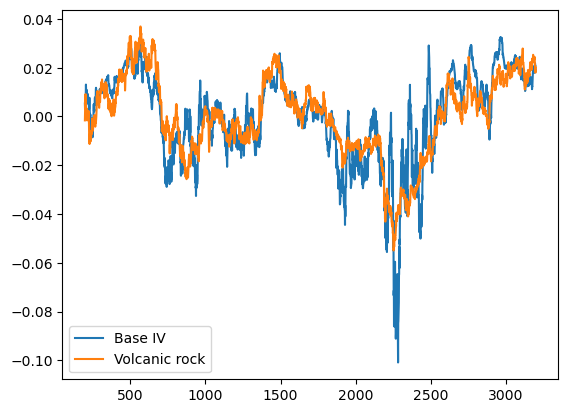

In [ ]:
time_length = 1000
plt.plot(df['base_iv_ma20'][:time_length] / np.mean(df['base_iv_ma20'][:time_length]) -  1, label = 'Base IV')
plt.plot((df['VOLCANIC_ROCK'][:time_length] / np.mean(df['VOLCANIC_ROCK'][:time_length]) - 1) * (-4.5), label = 'Volcanic rock')
plt.legend()

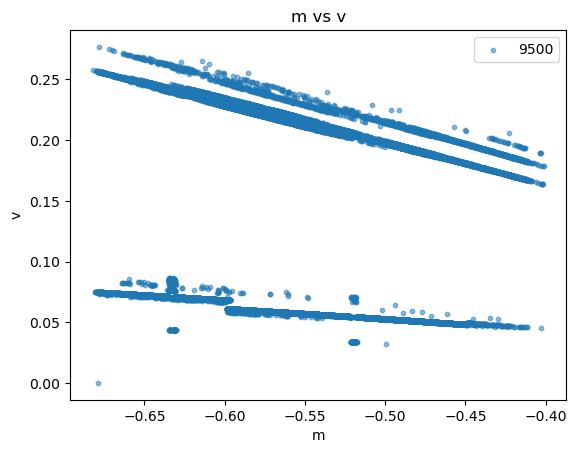

In [171]:
#画出m, v散点图
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df['m_9500'], df['iv_9500'], s=10, alpha=0.5, label = '9500')
#plt.scatter(df['m_9750'], df['iv_9750'], s=10, alpha=0.5, label = '9750')
#plt.scatter(df['m_10000'], df['iv_10000'], s=10, alpha=0.5, label = '10000')
#plt.scatter(df['m_10250'], df['iv_10250'], s=10, alpha=0.5, label = '10250')
#plt.scatter(df['m_10500'], df['iv_10500'], s=10, alpha=0.5, label = '10500')
plt.title('m vs v')
plt.xlabel('m')
plt.ylabel('v')
plt.legend()
plt.show()
